In [1]:
%reload_ext autoreload
%autoreload 2

import os
import torch
import torch.nn
from torch_geometric.data import Dataset
from torch_geometric.data import Data
from tqdm import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pyg_dataset import NetlistDataset

In [2]:
dataset = NetlistDataset(data_dir="../data/superblue", load_pd = False, load_pe = False, pl = True, processed = True, load_indices=None)

  0%|          | 0/12 [00:00<?, ?it/s]c:\Users\rebal\chip-design\src\pyg_dataset.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_load_fp)
100%|██

In [4]:
dataset[0]

Data(node_features=[797938, 45], net_features=[821523, 11], edge_index_sink_to_net=[2, 2139097], edge_index_source_to_net=[2, 810922], node_demand=[797938], net_demand=[821523], node_congestion=[797938], net_congestion=[821523], net_hpwl=[821523], batch=[797938], num_vn=99, pos_lst=[797938, 2], design_name='superblue_1')

In [15]:
dataset2 = NetlistDataset(data_dir="../data/superblue", load_pd = False, load_pe = False, pl = True, processed = False, load_indices=None)

100%|██████████| 12/12 [01:37<00:00,  8.16s/it]


In [18]:
np.mean(dataset2[0].mask)

0.9988874322447454

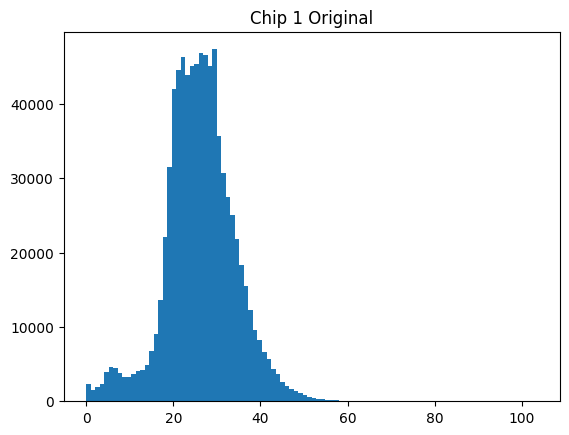

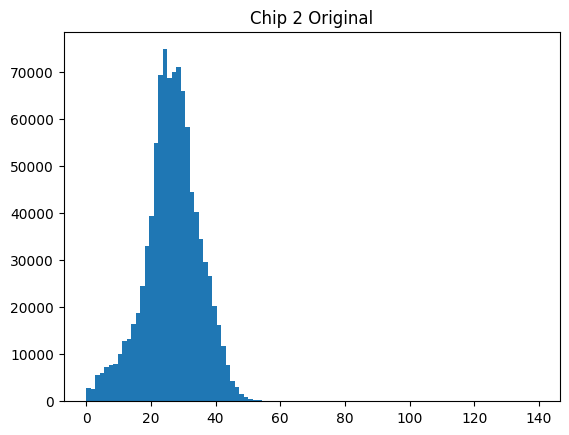

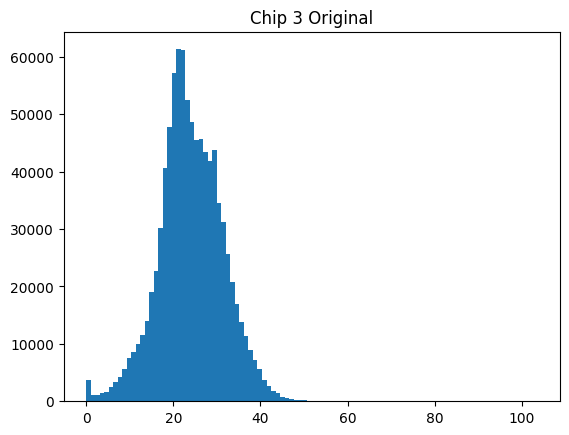

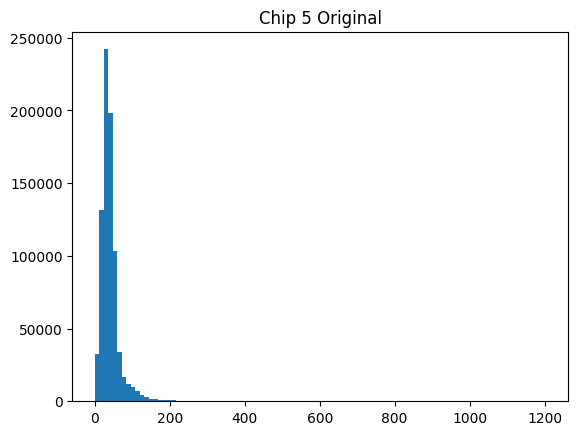

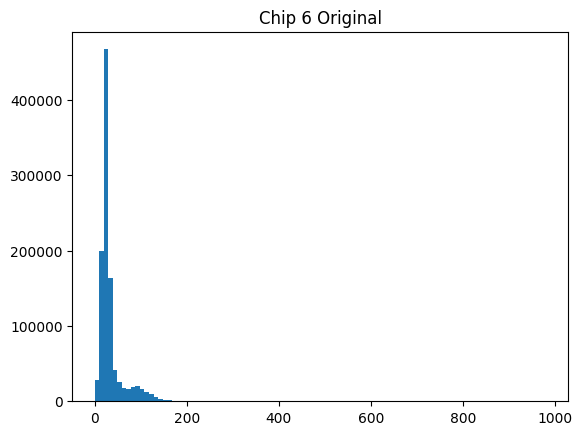

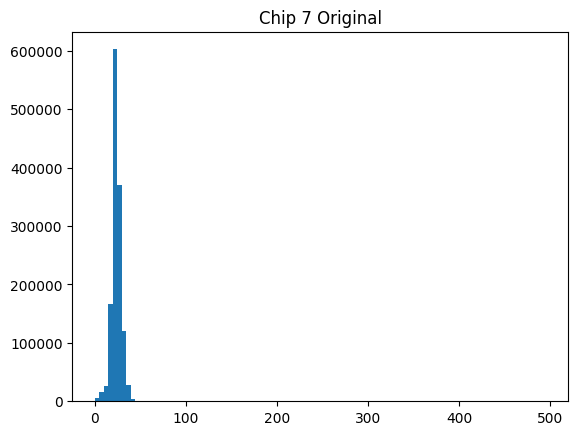

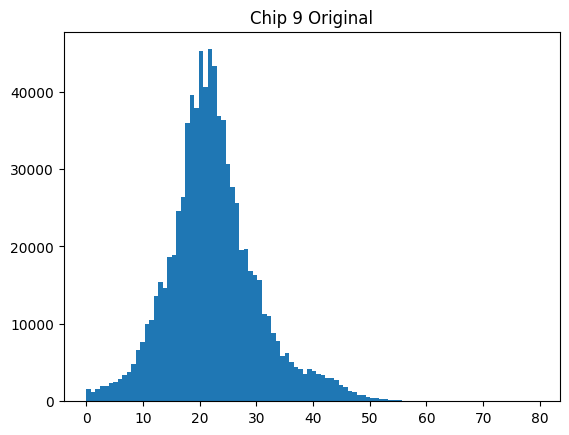

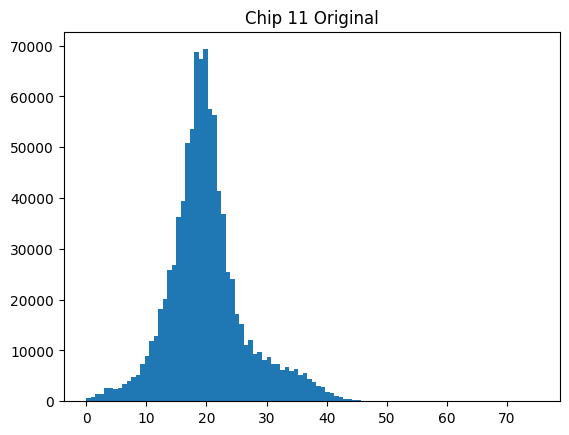

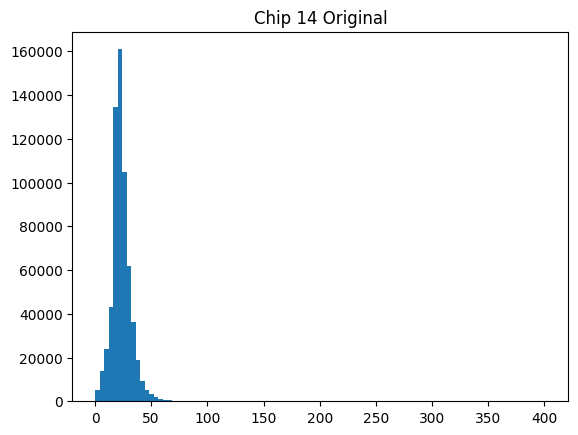

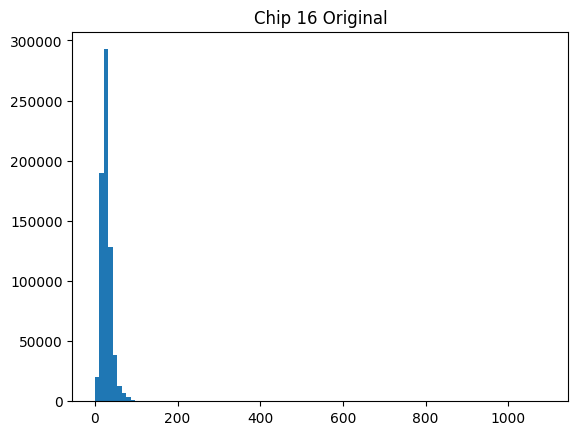

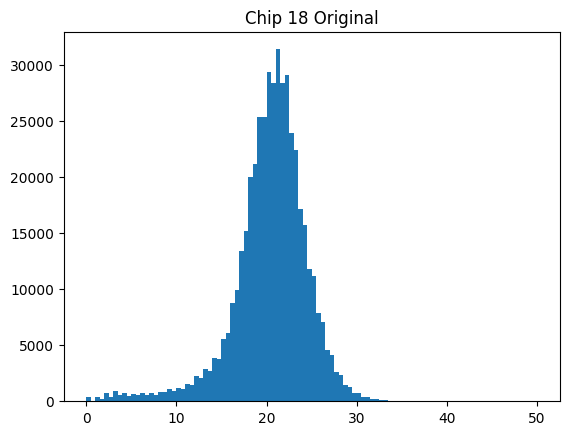

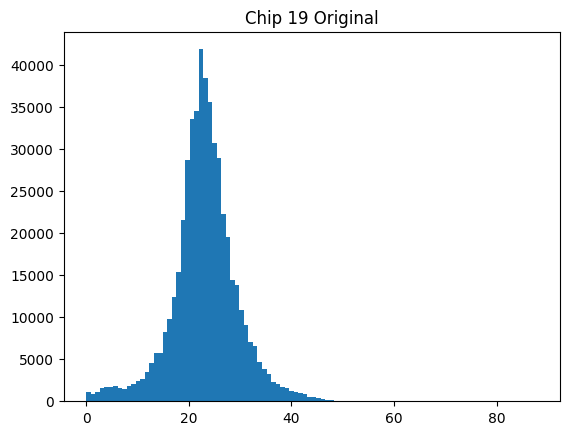

In [10]:
chips = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16, 18, 19]
for i in chips:
    data_load_fp = f'../data/superblue/superblue_{i}/'
    file_name = data_load_fp + '/' + 'net_demand_capacity.pkl'
    f = open(file_name, 'rb')
    net_demand_dictionary = pickle.load(f)
    f.close()

    demand = np.array(net_demand_dictionary['demand'])
    # demand = demand[demand <= 60]
    plt.hist(demand, bins=100)
    plt.title(f'Chip {i} Original')
    plt.show()


In [9]:
dataset[0]

Data(node_features=[797938, 45], net_features=[821523, 11], edge_index_sink_to_net=[2, 2139097], edge_index_source_to_net=[2, 810922], node_demand=[797938], net_demand=[821523], node_congestion=[797938], net_congestion=[821523], net_hpwl=[821523], batch=[797938], num_vn=99, pos_lst=[797938, 2], design_name='superblue_1')

In [191]:
chips = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16, 18, 19]
for i in chips:
    data_load_fp = f'../data/superblue/superblue_{i}/'
    file_name = data_load_fp + '/' + 'targets.pkl'
    f = open(file_name, 'rb')
    node_demand_dictionary = pickle.load(f)
    f.close()

    node_demand = node_demand_dictionary['demand']
    # print(sorted(node_demand, reverse=True)[:20])

    # plt.hist(node_demand, bins=100)
    # plt.title(f'Chip {i} Original')
    # plt.show()

    med = np.median(node_demand)
    q1 = np.quantile(node_demand, 0.25)
    q3 = np.quantile(node_demand, 0.75)
    iqr = q3 - q1
    bound = med + 5 * iqr

    filtered_demand = node_demand[node_demand <= bound]
    # print(len(node_demand) - len(filtered_demand))

    # plt.hist(filtered_demand, bins=100)
    # plt.title(f'Chip {i} Filtered')
    # plt.show()

    data_load_fp = f'../data/superblue/superblue_{i}/'
    file_name = data_load_fp + '/' + 'node_features.pkl'
    f = open(file_name, 'rb')
    dictionary = pickle.load(f)
    f.close()        
    num_instances = dictionary['num_instances']
    num_nets = dictionary['num_nets']
    raw_instance_features = np.array(dictionary['instance_features'])

    data_load_fp = f'../data/superblue/superblue_{i}/'
    file_name = data_load_fp + '/' + 'bipartite.pkl'
    f = open(file_name, 'rb')
    dictionary = pickle.load(f)
    f.close()

    fn = data_load_fp + '/' + 'degree.pkl'
    f = open(fn, "rb")
    d = pickle.load(f)
    f.close()

    cell_degrees = np.array(d['cell_degrees'])
    net_degrees = np.array(d['net_degrees'])

    r = list(range(num_instances))
    idx = np.unique(dictionary['instance_idx'])
    mask = np.isin(r, idx)

    print(f'Chip {i}')
    # print(num_nets)
    # print(np.unique(dictionary['net_idx']).shape)
    # print(net_degrees.shape)
    # print(num_instances)
    # print(np.unique(dictionary['instance_idx']).shape)
    # print(cell_degrees.shape)
    print(np.where(mask == False)[0])
    print(num_instances)
    # print(np.array(node_demand[mask]))
    print()


Chip 1
[770222 770223 770224 770225 770231 770233 770234 770235 770242 770243
 770244 770247 770248 770255 770256 770257 770258 770260 770261 770269
 770270 770271 770272 770274 770275 770283 770284 770285 770453 770454
 770455 770459 770461 770462 770475 770480 770494 770495 770500 770501
 770516 770517 770518 770519 770520 770521 770522 770523 770524 770525
 770527 770528 770529 770530 770535 770537 770538 770539 770540 770541
 770542 770543 770544 770545 770546 770548 770549 770550 770567 770568
 770569 770570 770571 770572 770573 770574 770576 770577 770578 770579
 770580 770581 770587 770588 770589 770590 770591 770592 770593 770594
 770595 770597 770598 770599 770600 770601 770617 770618 770619 770620
 770621 770622 770624 770625 770626 770627 770628 770629 770630 770631
 770637 770638 770639 770640 770641 770642 770643 770645 770646 770647
 770648 770649 770650 770651 770664 770665 770666 770667 770668 770669
 770670 770671 770672 770674 770675 770676 770677 770678 770679 770680

In [234]:
i = 6
data_load_fp = f'../data/superblue/superblue_{i}/'
file_name = data_load_fp + '/' + 'node_features.pkl'
f = open(file_name, 'rb')
dictionary = pickle.load(f)
f.close()        

num_instances = dictionary['num_instances']
num_nets = dictionary['num_nets']

In [236]:
data_load_fp = f'../data/superblue/superblue_{i}/'
file_name = data_load_fp + '/' + 'targets.pkl'
f = open(file_name, 'rb')
node_demand_dictionary = pickle.load(f)
f.close()

node_demand = node_demand_dictionary['demand']

med = np.median(node_demand)
q1 = np.quantile(node_demand, 0.25)
q3 = np.quantile(node_demand, 0.75)
iqr = q3 - q1
bound = med + 5 * iqr

outlier_idx = node_demand > bound

In [239]:
data_load_fp = f'../data/superblue/superblue_{i}/'
file_name = data_load_fp + '/' + 'bipartite.pkl'
f = open(file_name, 'rb')
dictionary = pickle.load(f)
f.close()

In [261]:
instance_idx = dictionary['instance_idx']
net_idx = dictionary['net_idx']

dead_node = ~np.isin(range(num_instances), instance_idx)
remove_idx = np.array(range(num_instances))[dead_node | outlier_idx]

In [262]:
dead_node.mean()

0.00032661337992750386

In [278]:
dead_node.shape

(998122,)

In [279]:
outlier_idx.shape

(998122,)

In [263]:
outlier_idx.mean()

0.019304253387862406

In [270]:
remove_idx.shape

(19594,)

In [265]:
instance_idx = torch.Tensor(dictionary['instance_idx']).unsqueeze(dim = 1).long()
net_idx = torch.Tensor(dictionary['net_idx']) + num_instances
net_idx = net_idx.unsqueeze(dim = 1).long()
edge_attr = torch.Tensor(dictionary['edge_attr']).float().unsqueeze(dim = 1).float()
edge_index = torch.cat((instance_idx, net_idx), dim = 1)
edge_dir = dictionary['edge_dir']

In [266]:
edge_index.shape

torch.Size([3560375, 2])

In [267]:
edge_filter = np.isin(edge_index[:, 0], (remove_idx))
edge_filter

array([False, False, False, ..., False, False, False])

In [268]:
filtered_edges = edge_index[~edge_filter]

In [269]:
filtered_edges.shape

torch.Size([3483897, 2])

In [271]:
remaining_nets = torch.unique(filtered_edges[:, 1])

In [276]:
np.unique(np.array(remaining_nets)).shape

(1035457,)

In [277]:
num_nets

1049225

In [175]:
edge_index[:, 1].unique().shape

torch.Size([1047159])

In [129]:
remaining_nets.shape

torch.Size([1035457])

In [159]:
num_nets - remaining_nets.shape[0]

13768

In [132]:
mask_nets = torch.isin(edge_index[:, 1], remaining_nets)

In [133]:
np.array(mask_nets).mean()

0.9929493382017344

In [152]:
np.where(mask_nets == False)[0]

array([ 179440,  181138,  181153, ..., 3536322, 3558955, 3558956],
      dtype=int64)

In [163]:
np.unique((edge_index[edge_filter][:, 1].unique() - num_instances))

array([      0,    1204,    3107, ..., 1048715, 1048726, 1048737],
      dtype=int64)

In [171]:
edge_index[edge_filter]

tensor([[ 619393,  998122],
        [ 619580,  998122],
        [ 619583,  998122],
        ...,
        [ 995628, 2046837],
        [ 995650, 2046848],
        [ 995650, 2046859]])

In [206]:
fn = data_load_fp + '/' + 'degree.pkl'
f = open(fn, "rb")
d = pickle.load(f)
f.close()

cell_degrees = torch.tensor(d['cell_degrees'])
net_degrees = torch.tensor(d['net_degrees'])

In [207]:
net_degrees.shape

torch.Size([1049225])

In [215]:
np.array(cell_degrees == 0).mean()

0.00032661337992750386